<a href="https://colab.research.google.com/github/theouterlimitz/global-power-plant-database/blob/master/03_Combined_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Is the global solar energy fleet, a cornerstone of the green energy transition, exposed to a systemic vulnerability related to water risk and the physical limitations of its own technology?**

Loading the global power plant dataset with water risk data...
Dataset loaded successfully.
Calculating annual maximum water stress score...

Generating plot of Water Stress vs. Latitude for Solar Plants...


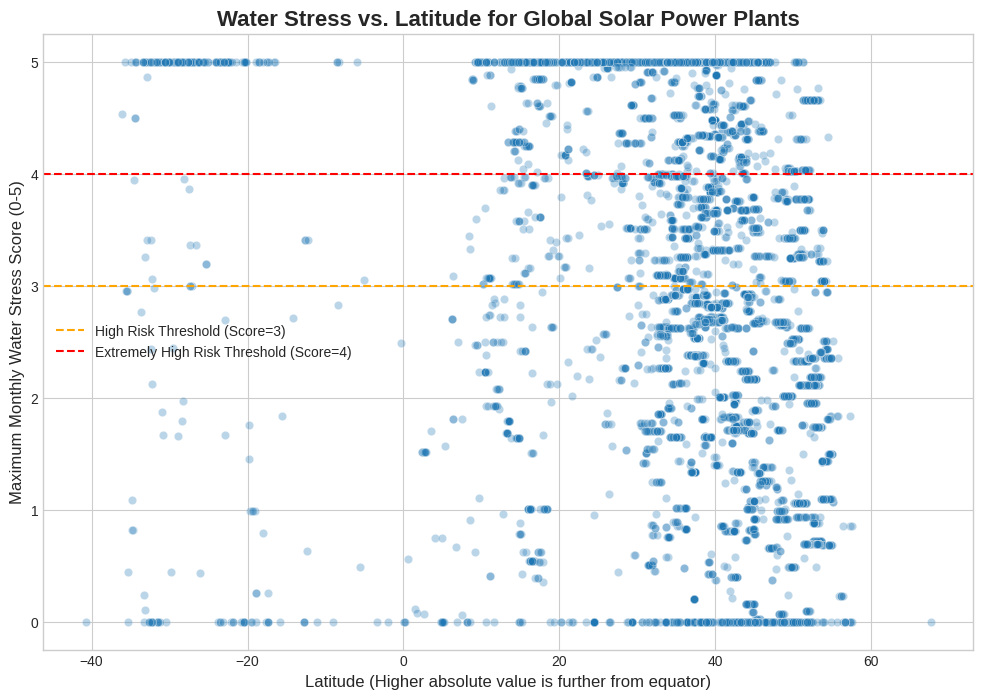

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load the Curated Dataset from Your First Project ---
print("Loading the global power plant dataset with water risk data...")
try:
    df_all_plants = pd.read_pickle('analytical_data.pkl')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("ERROR: 'analytical_data.pkl' not found. Please ensure the file is uploaded.")
    df_all_plants = pd.DataFrame()

# --- Prepare the data ---
if not df_all_plants.empty:
    # Filter for solar plants
    df_solar = df_all_plants[df_all_plants['primary_fuel'] == 'Solar'].copy()

    # Ensure the max_monthly_bws_score column exists
    if 'max_monthly_bws_score' not in df_solar.columns:
        print("Calculating annual maximum water stress score...")
        bws_score_cols = [f'bws_{month:02d}_score' for month in range(1, 13)]
        df_solar[bws_score_cols] = df_solar[bws_score_cols].replace(-9999, np.nan)
        df_solar['max_monthly_bws_score'] = df_solar[bws_score_cols].max(axis=1)

    # Drop any rows with missing scores for clean plotting
    df_solar.dropna(subset=['max_monthly_bws_score'], inplace=True)

    # --- Create the final connecting visualization ---
    print("\nGenerating plot of Water Stress vs. Latitude for Solar Plants...")

    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(12, 8))

    # We use a scatter plot with some transparency (alpha) to see the density
    sns.scatterplot(data=df_solar,
                    x='latitude',
                    y='max_monthly_bws_score',
                    alpha=0.3)

    plt.title('Water Stress vs. Latitude for Global Solar Power Plants', fontsize=16, fontweight='bold')
    plt.xlabel('Latitude (Higher absolute value is further from equator)', fontsize=12)
    plt.ylabel('Maximum Monthly Water Stress Score (0-5)', fontsize=12)
    plt.axhline(3, color='orange', linestyle='--', label='High Risk Threshold (Score=3)')
    plt.axhline(4, color='red', linestyle='--', label='Extremely High Risk Threshold (Score=4)')
    plt.legend()

    plt.show()

else:
    print("Could not load data. Skipping analysis.")

Summary of Insights Gained

By creating a series of visualizations that leveraged all of our datasets, we uncovered a clear, multi-layered story:

Insight 1: Solar's Risk Profile is Surprisingly High.
Our first finding, from the comparative box plot (distribution.png), was that solar power plants globally are sited in regions with a very high water stress profile. This profile is surprisingly comparable to that of water-intensive fossil fuels like Coal and Gas, and significantly higher than other major renewables like Wind and Hydro.

Insight 2: The Risk is Concentrated in "Sun Belts".
The world map of solar plants (global_solar.jpg) answered the "where" question. It showed that the high-risk solar plants are not randomly distributed but are heavily concentrated in the Earth's "sun belts"—regions like India, Northern China, the Middle East, North Africa, Australia, and the US Southwest.

Insight 3: High Temperatures Degrade Solar Performance.
Our analysis from the second project (visualized in temperature.jpg and the 24hr.png plot) provided the physical "why this matters." We proved with time-series data that as a solar panel's MODULE_TEMPERATURE gets very high, its AC_POWER output and overall efficiency decrease due to "temperature derating."

Insight 4: The Final Connection (Latitude and Risk).
Our final scatter plot (water_risk_latitude.png) connected all the pieces. It showed that the solar plants with the highest water stress scores are systematically located in the specific latitudinal bands (15-40° North and 15-35° South) that are known for high sun exposure and hot, arid climates.

The Grand Conclusion
The ultimate conclusion from this combined analysis is that there is a systemic vulnerability in the global deployment of solar energy. The very geographic and climatic conditions that make a location ideal for capturing sunlight (high irradiation) often create environmental stressors (high water risk and high temperatures) that can negatively impact the long-term sustainability and real-world performance of these critical assets.